<a href="https://colab.research.google.com/github/alistechworld/Machine-Learning-Hands-On-Practice-and-Code/blob/main/Day_35_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regression Matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving placement (4).csv to placement (4).csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement (4).csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [6]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

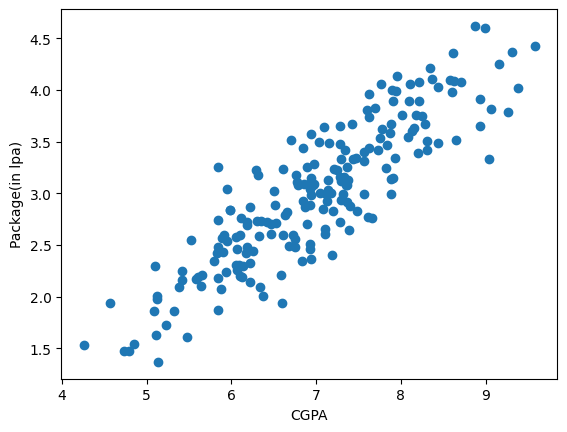

In [7]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [8]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [9]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
from sklearn.linear_model  import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

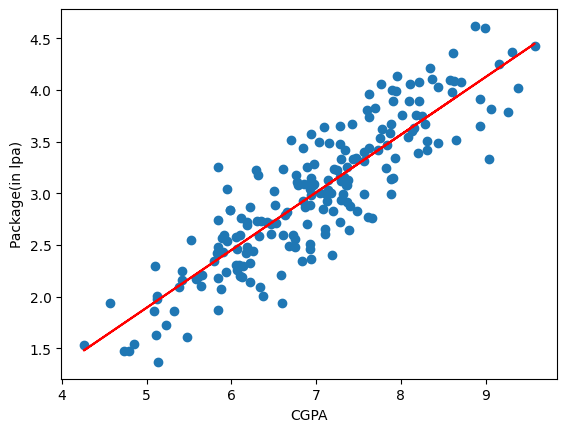

In [14]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [17]:
y_test.values


array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [22]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [23]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [24]:
print("MSE", r2_score(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

MSE 0.780730147510384


In [25]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [26]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [27]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head

<bound method NDFrame.head of      cgpa  random_feature  package
0    6.89        0.246764     3.26
1    5.12        0.244088     1.98
2    7.82        0.201627     3.25
3    7.42        0.115580     3.67
4    6.94        0.644826     3.57
..    ...             ...      ...
195  6.93        0.335153     2.46
196  5.89        0.854526     2.57
197  7.21        0.297584     3.24
198  7.63        0.646529     3.96
199  6.22        0.925828     2.33

[200 rows x 3 columns]>

Text(0, 0.5, 'Package(in lpa)')

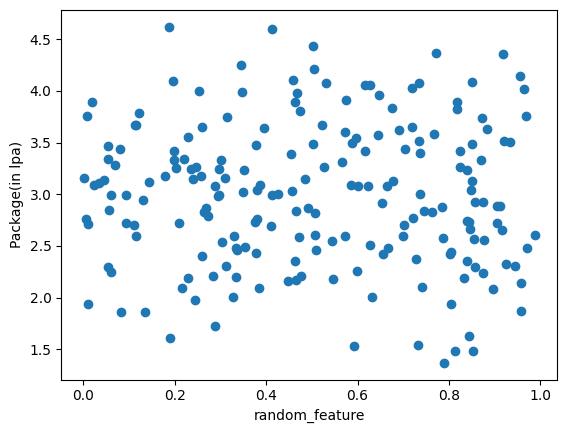

In [28]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [29]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7744528746288661


In [35]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7622611381223183

In [36]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [37]:
new_df2.sample(5)

,cgpa,iq,package
116,9.04,2.53,3.33
21,6.85,2.53,2.93
63,9.16,3.85,4.25
85,4.79,0.58,1.48
82,5.58,1.37,2.17


Text(0, 0.5, 'Package(in lpa)')

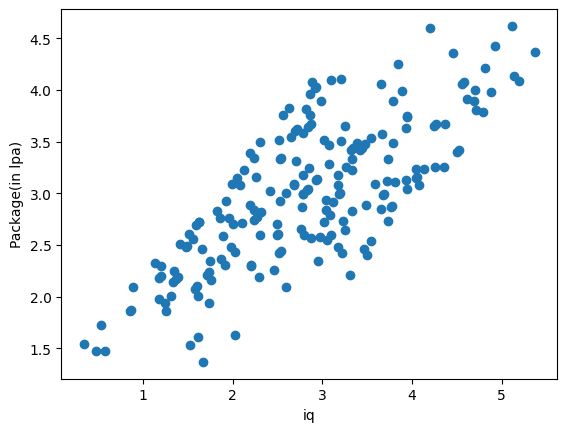

In [38]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [39]:
np.random.randint(-100,100)

72

In [40]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [43]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8466801227721743


In [44]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8383925618409405